__Pipeline Inversion__

In this tutorial, we'll go back to our complex source pipeline, but this time, as you've probably guessed, fit it using an inversion. As we discussed in tutorial 6, we'll begin by modeling the source with a light profile, to initialize the mass model, and then switch to an inversion.

In [1]:
import autofit as af
from autolens.data import ccd
from autolens.data import simulated_ccd
from autolens.model.profiles import light_profiles as lp
from autolens.model.profiles import mass_profiles as mp
from autolens.data.plotters import ccd_plotters

Lets setup the path to the workspace, as we are now used to doing for pipelines.

In [2]:
# If you are using Docker, the paths to the chapter is as follows (e.g. comment out this line)!
# path = '/home/user/workspace/'

# If you arn't using docker, you need to change the path below to the chapter 3 directory and uncomment it
# path = '/path/to/workspace/'

af.conf.instance = af.conf.Config(config_path=path+'config', output_path=path+'output')

This function simulates the complex source, and is the same function we used in chapter 3, tutorial 3.

In [2]:
def simulate():

    from autolens.data.array import grids
    from autolens.model.galaxy import galaxy as g
    from autolens.lens import ray_tracing

    psf = ccd.PSF.from_gaussian(shape=(11, 11), sigma=0.05, pixel_scale=0.05)

    image_plane_grid_stack = grids.GridStack.grid_stack_for_simulation(
        shape=(180, 180), pixel_scale=0.05, psf_shape=(11, 11))

    lens_galaxy = g.Galaxy(
        redshift=0.5,
        mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), axis_ratio=0.8, phi=135.0, einstein_radius=1.6))

    source_galaxy_0 = g.Galaxy(
        redshift=1.0,
        light=lp.EllipticalSersic(centre=(0.1, 0.1), axis_ratio=0.8, phi=90.0, intensity=0.2, effective_radius=1.0,
                                  sersic_index=1.5))

    source_galaxy_1 = g.Galaxy(
        redshift=1.0,
        light=lp.EllipticalSersic(centre=(-0.25, 0.25), axis_ratio=0.7, phi=45.0, intensity=0.1, effective_radius=0.2,
                                  sersic_index=3.0))

    source_galaxy_2 = g.Galaxy(
        redshift=1.0,
        light=lp.EllipticalSersic(centre=(0.45, -0.35), axis_ratio=0.6, phi=90.0, intensity=0.03, effective_radius=0.3,
                                  sersic_index=3.5))

    source_galaxy_3 = g.Galaxy(
        redshift=1.0,
        light=lp.EllipticalSersic(centre=(-0.05, -0.0), axis_ratio=0.9, phi=140.0, intensity=0.03, effective_radius=0.1,
                                  sersic_index=4.0))

    tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy],
                                                 source_galaxies=[source_galaxy_0, source_galaxy_1,
                                                                  source_galaxy_2, source_galaxy_3],
                                                 image_plane_grid_stack=image_plane_grid_stack)

    return simulated_ccd.SimulatedCCDData.from_image_and_exposure_arrays(
        image=tracer.profile_image_plane_image_2d_for_simulation, pixel_scale=0.05,
        exposure_time=300.0, psf=psf, background_sky_level=0.1, add_noise=True)

Lets simulate the image we'll fit, which is the same complex source as the '_chapter_3_pipelines/tutorial_3_complex_source.py_' tutorial.

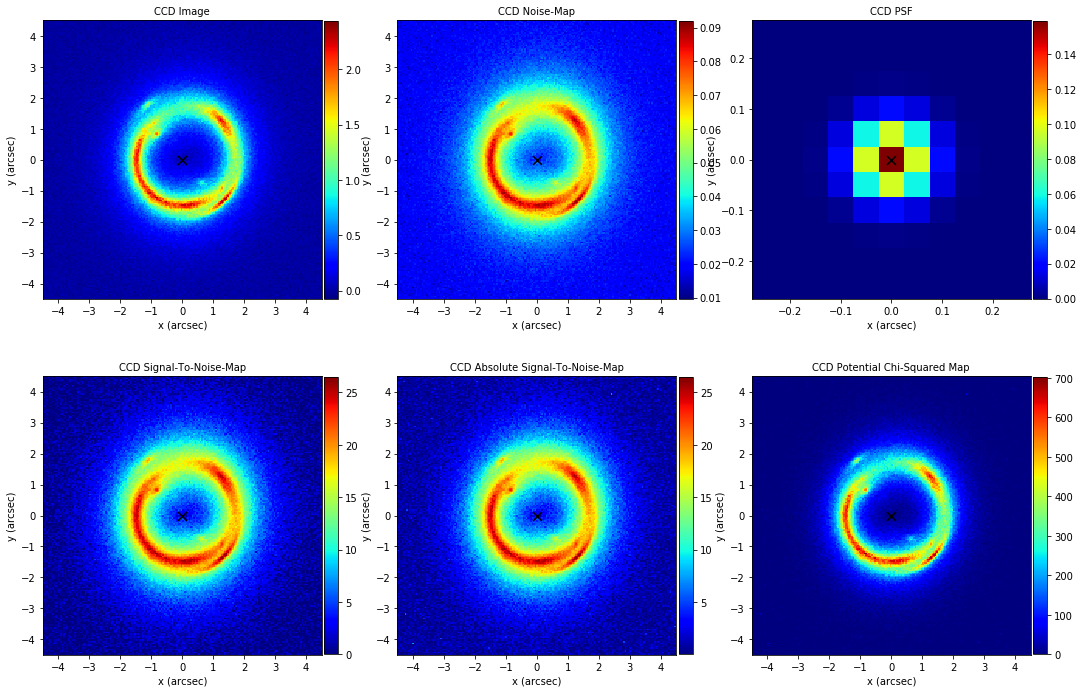

In [3]:
ccd_data = simulate()
ccd_plotters.plot_ccd_subplot(ccd_data=ccd_data)

Lets import the pipeline and run it.

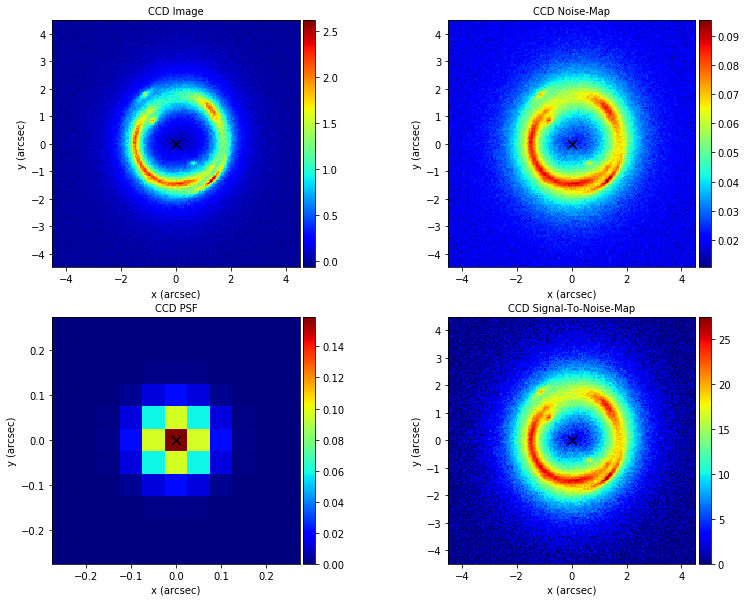

In [5]:
from workspace.howtolens.chapter_4_inversions import tutorial_8_pipeline

pipeline_inversion = tutorial_8_pipeline.make_pipeline(
    phase_folders=['howtolens','c4_t7_6_inversion'])

pipeline_inversion.run(data=ccd_data)

Now is the time to go to the pipeline itself (_tutorial_8_pipeline.py_) and checkout how it performs the analysis.

Read the pipeline file? Great!  With that, we're done. We now have a pipeline to model strong lenses using an inversion! 

Checkout the example pipelines in '_workspace/pipelines/examples/_' for more examples of pipelines that use an inversion, including one which also fits the lens galaxy's light.